In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import matplotlib as mpl

mpl.rcParams['pdf.fonttype'] = 42
sns.set_style('white')
sns.set_context("poster", font_scale=1.5)

In [3]:
from concerto.helpers.load_model_from_git import load_model_from_git
rt_git = load_model_from_git('Rhodosporidium')

Set parameter Username
Set parameter GURO_PAR_SPECIAL
Set parameter TokenServer to value "leghorn"


In [4]:
from rtoru import exp_file_path as rt_path, model as rt, mar_model as mar_rt
from a_vine import model as av, exp_file_path as av_path

In [5]:
from memote.experimental.config import ExperimentConfiguration

In [6]:
rt.slim_optimize()

0.07336590453116676

In [7]:
rt_git.slim_optimize()

0.07336590453116676

In [8]:
mar_rt.slim_optimize()

6.468367839572824

In [9]:
av.slim_optimize()

0.47812105018350276

In [10]:
rt_experiment_data = ExperimentConfiguration(rt_path).load(rt)
av_experiment_data = ExperimentConfiguration(av_path).load(av)

In [11]:
m9_carbon_av = av_experiment_data.media['no_carbon'].data[['exchange', 'uptake']].set_index('exchange').to_dict()['uptake']
m9_carbon_rt = rt_experiment_data.media['no_carbon'].data[['exchange', 'uptake']].set_index('exchange').to_dict()['uptake']

In [12]:
m9_carbon_rt

{'EX_nh4_e': 1000,
 'EX_o2_e': 1000,
 'EX_pi_e': 1000,
 'EX_so4_e': 1000,
 'EX_ca2_e': 1000,
 'EX_fe3_e': 1000,
 'EX_k_e': 1000,
 'EX_na1_e': 1000,
 'EX_mg2_e': 1000,
 'EX_mn2_e': 1000,
 'EX_cu2_e': 1000,
 'EX_zn2_e': 1000}

In [13]:
m9_no_carbon = {**m9_carbon_rt, **m9_carbon_av}
m9_no_carbon

{'EX_nh4_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_pi_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_ca2_e': 1000.0,
 'EX_fe3_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_na1_e': 1000,
 'EX_mg2_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_zn2_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_ni2_e': 1000.0,
 'EX_cobalt2_e': 1000.0,
 'EX_mobd_e': 1000.0,
 'EX_cl_e': 1000.0}

In [14]:
rt_carbon = rt_experiment_data.growth['biolog_carbon'].data
av_carbon = av_experiment_data.growth['biolog_pm1'].data

In [15]:
rt_carbon

,exchange,growth,uptake
0,EX_arab__L_e,True,10
1,EX_acgam_e,False,10
2,EX_glcr_e,False,10
3,EX_succ_e,True,10
4,EX_gal_e,True,10
...,...,...,...
82,EX_orn_e,True,10
83,EX_phe__L_e,False,10
84,EX_val__L_e,True,10
85,EX_ptrc_e,False,10


In [16]:
rt_can_grow = set(rt_carbon.loc[rt_carbon.growth].exchange.values)
av_can_grow = set(av_carbon.loc[av_carbon.growth].exchange.values)

In [17]:
av_can_grow

{'EX_12ppd__S_e',
 'EX_5dglcn_e',
 'EX_ac_e',
 'EX_acac_e',
 'EX_acgam_e',
 'EX_acnam_e',
 'EX_akg_e',
 'EX_ala__D_e',
 'EX_ala__L_e',
 'EX_asp__L_e',
 'EX_but_e',
 'EX_cit_e',
 'EX_dad_2_e',
 'EX_dca_e',
 'EX_f6p_e',
 'EX_for_e',
 'EX_fru_e',
 'EX_fum_e',
 'EX_g1p_e',
 'EX_g6p_e',
 'EX_gal_e',
 'EX_galct__D_e',
 'EX_galctn__D_e',
 'EX_glc__D_e',
 'EX_glcn_e',
 'EX_glcur_e',
 'EX_gln__L_e',
 'EX_glyc3p_e',
 'EX_glyc_e',
 'EX_glyclt_e',
 'EX_hxa_e',
 'EX_inost_e',
 'EX_ins_e',
 'EX_lac__L_e',
 'EX_lcts_e',
 'EX_malt_e',
 'EX_malttr_e',
 'EX_melib_e',
 'EX_mnl_e',
 'EX_ppa_e',
 'EX_pyr_e',
 'EX_rib__D_e',
 'EX_rmn_e',
 'EX_sbt__D_e',
 'EX_ser__D_e',
 'EX_ser__L_e',
 'EX_succ_e',
 'EX_sucr_e',
 'EX_tartr__L_e',
 'EX_thr__L_e',
 'EX_xyl__D_e'}

In [18]:
from magine.plotting.venn_diagram_maker import create_venn2

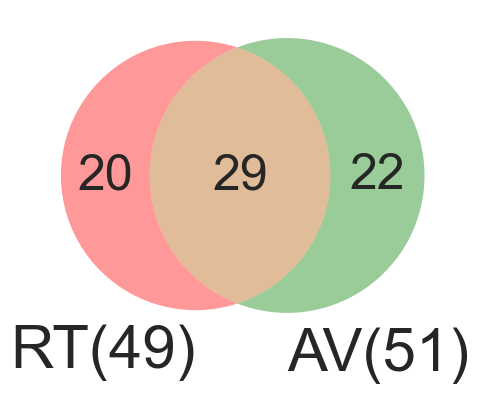

In [19]:
create_venn2(rt_can_grow, av_can_grow, 'RT', 'AV')
plt.savefig("overlap_biolog_hits.png")

In [20]:
for i in rt_can_grow.difference(av_can_grow):
    print(i)

EX_val__L_e
EX_tre_e
EX_4abut_e
EX_dha_e
EX_pro__L_e
EX_glu__L_e
EX_leu__L_e
EX_man_e
EX_galt_e
EX_lyx__L_e
EX_mal__D_e
EX_arab__L_e
EX_orn_e
EX_arg__L_e
EX_asn__L_e
EX_galur_e
EX_hom__L_e
EX_ile__L_e
EX_galctn__L_e
EX_gly_e


In [21]:
for i in av_can_grow.difference(rt_can_grow):
    print(i)

EX_tartr__L_e
EX_ins_e
EX_glyc3p_e
EX_malt_e
EX_f6p_e
EX_12ppd__S_e
EX_inost_e
EX_glcur_e
EX_glyclt_e
EX_cit_e
EX_melib_e
EX_g1p_e
EX_acnam_e
EX_lcts_e
EX_rmn_e
EX_galct__D_e
EX_galctn__D_e
EX_fum_e
EX_dca_e
EX_dad_2_e
EX_acgam_e
EX_g6p_e


In [22]:
av_only_grow = av_can_grow.difference(rt_can_grow)

In [23]:
rt_only_grow = rt_can_grow.difference(av_can_grow)

In [24]:
medium = m9_no_carbon
medium

{'EX_nh4_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_pi_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_ca2_e': 1000.0,
 'EX_fe3_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_na1_e': 1000,
 'EX_mg2_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_zn2_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_ni2_e': 1000.0,
 'EX_cobalt2_e': 1000.0,
 'EX_mobd_e': 1000.0,
 'EX_cl_e': 1000.0}

In [25]:
rt_can_grow

{'EX_4abut_e',
 'EX_5dglcn_e',
 'EX_ac_e',
 'EX_acac_e',
 'EX_akg_e',
 'EX_ala__D_e',
 'EX_ala__L_e',
 'EX_arab__L_e',
 'EX_arg__L_e',
 'EX_asn__L_e',
 'EX_asp__L_e',
 'EX_but_e',
 'EX_dha_e',
 'EX_for_e',
 'EX_fru_e',
 'EX_gal_e',
 'EX_galctn__L_e',
 'EX_galt_e',
 'EX_galur_e',
 'EX_glc__D_e',
 'EX_glcn_e',
 'EX_gln__L_e',
 'EX_glu__L_e',
 'EX_gly_e',
 'EX_glyc_e',
 'EX_hom__L_e',
 'EX_hxa_e',
 'EX_ile__L_e',
 'EX_lac__L_e',
 'EX_leu__L_e',
 'EX_lyx__L_e',
 'EX_mal__D_e',
 'EX_malttr_e',
 'EX_man_e',
 'EX_mnl_e',
 'EX_orn_e',
 'EX_ppa_e',
 'EX_pro__L_e',
 'EX_pyr_e',
 'EX_rib__D_e',
 'EX_sbt__D_e',
 'EX_ser__D_e',
 'EX_ser__L_e',
 'EX_succ_e',
 'EX_sucr_e',
 'EX_thr__L_e',
 'EX_tre_e',
 'EX_val__L_e',
 'EX_xyl__D_e'}

In [26]:
av_can_grow

{'EX_12ppd__S_e',
 'EX_5dglcn_e',
 'EX_ac_e',
 'EX_acac_e',
 'EX_acgam_e',
 'EX_acnam_e',
 'EX_akg_e',
 'EX_ala__D_e',
 'EX_ala__L_e',
 'EX_asp__L_e',
 'EX_but_e',
 'EX_cit_e',
 'EX_dad_2_e',
 'EX_dca_e',
 'EX_f6p_e',
 'EX_for_e',
 'EX_fru_e',
 'EX_fum_e',
 'EX_g1p_e',
 'EX_g6p_e',
 'EX_gal_e',
 'EX_galct__D_e',
 'EX_galctn__D_e',
 'EX_glc__D_e',
 'EX_glcn_e',
 'EX_glcur_e',
 'EX_gln__L_e',
 'EX_glyc3p_e',
 'EX_glyc_e',
 'EX_glyclt_e',
 'EX_hxa_e',
 'EX_inost_e',
 'EX_ins_e',
 'EX_lac__L_e',
 'EX_lcts_e',
 'EX_malt_e',
 'EX_malttr_e',
 'EX_melib_e',
 'EX_mnl_e',
 'EX_ppa_e',
 'EX_pyr_e',
 'EX_rib__D_e',
 'EX_rmn_e',
 'EX_sbt__D_e',
 'EX_ser__D_e',
 'EX_ser__L_e',
 'EX_succ_e',
 'EX_sucr_e',
 'EX_tartr__L_e',
 'EX_thr__L_e',
 'EX_xyl__D_e'}

In [27]:
from copy import deepcopy
import cobra

In [28]:
rt.medium = m9_carbon_rt
rt.optimize()

C:\Users\pino216\Miniconda3\envs\whole-cell-gemm\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


<Solution infeasible at 0x10b90314250>

In [29]:
sol = rt_git.optimize()
x = sol.fluxes[[i.id for i in rt_git.boundary]]
x = x[np.abs(x)>0]
x.sort_values()

EX_o2_e         -2.287342
EX_glc__D_e     -1.000000
EX_nh4_e        -0.484237
EX_k_e          -0.042971
EX_pi_e         -0.019531
EX_so4_e        -0.007354
EX_mg2_e        -0.004528
EX_na1_e        -0.001915
EX_fe3_e        -0.000453
EX_ca2_e        -0.000061
EX_mn2_e        -0.000045
EX_cu2_e        -0.000039
EX_zn2_e        -0.000037
DM_4oglu_c       0.000102
DM_dad_5_m       0.000177
DM_amob_m        0.000177
SRC_8aonn_m      0.000177
SRC_lipoate_m    0.000228
EX_fe2_e         0.000314
SRC_trnatrp_c    0.001711
SRC_trnacys_c    0.002514
SRC_trnamet_c    0.004186
SRC_trnahis_c    0.004488
SRC_trnatyr_c    0.004575
SRC_trnaphe_c    0.006982
SRC_trnaasn_c    0.007921
SRC_trnagln_c    0.008650
EX_zymst_e       0.009900
SRC_trnaarg_c    0.010761
SRC_trnaile_c    0.011634
SRC_trnalys_c    0.012643
SRC_trnaasp_c    0.014475
SRC_trnaglu_c    0.015309
SRC_trnathr_c    0.016003
SRC_trnapro_c    0.017307
SRC_trnaval_c    0.020188
SRC_trnaleu_c    0.023492
SRC_trnaser_c    0.024715
SRC_trnagly_

In [30]:
def check_growth(carbon_source):
    med_copy = deepcopy(m9_carbon_rt)
    med_copy[carbon_source] = 1000
    with rt_git as m:
        m.medium = med_copy
        # there a reason to use optimize over pfba?
        # sol = m.optimize()
        try:
            pfba_solution = cobra.flux_analysis.pfba(m, reactions=list(av_can_grow))
        except Exception as e:
            return None, None

        ex = pfba_solution.fluxes
        hits = ex[np.abs(ex)>0]
        if len(set(hits.index.values).intersection(av_can_grow)) > 0:
            print(carbon_source, set(hits.index.values).intersection(av_only_grow))
            return carbon_source, set(hits.index.values).intersection(av_only_grow)
        return None, None
good_hits = []
for i in reversed(list(rt_only_grow)):
    good_hits.append(check_growth(i))

EX_hom__L_e {'EX_glyclt_e'}
EX_arab__L_e {'EX_glyclt_e'}
EX_lyx__L_e {'EX_glyclt_e'}
EX_galt_e {'EX_glyclt_e'}
EX_man_e {'EX_glyclt_e'}
EX_leu__L_e {'EX_glyclt_e'}
EX_glu__L_e {'EX_glyclt_e'}
EX_dha_e {'EX_glyclt_e'}
EX_4abut_e {'EX_glyclt_e'}
EX_tre_e {'EX_glyclt_e'}


In [31]:
import cobra

In [32]:

# ex += [i.id for i in rt.demands]
# ex += [i.id for i in rt.sinks]

In [33]:
ex = [i.id for i in rt_git.boundary]
pfba_solution = cobra.flux_analysis.pfba(rt_git, reactions=ex)
f= pfba_solution.fluxes
f[np.abs(f)>0].sort_values()

EX_o2_e         -2.287342
EX_glc__D_e     -1.000000
EX_nh4_e        -0.484237
EX_k_e          -0.042971
EX_pi_e         -0.019531
EX_so4_e        -0.007354
EX_mg2_e        -0.004528
EX_na1_e        -0.001915
EX_fe3_e        -0.000453
EX_ca2_e        -0.000061
EX_mn2_e        -0.000045
EX_cu2_e        -0.000039
EX_zn2_e        -0.000037
DM_4oglu_c       0.000102
SRC_8aonn_m      0.000177
DM_amob_m        0.000177
DM_dad_5_m       0.000177
SRC_lipoate_m    0.000228
EX_fe2_e         0.000314
SRC_trnatrp_c    0.001711
EX_hco3_e        0.001839
SRC_trnacys_c    0.002514
SRC_trnamet_c    0.004186
SRC_trnahis_c    0.004488
SRC_trnatyr_c    0.004575
SRC_trnaphe_c    0.006982
SRC_trnaasn_c    0.007921
SRC_trnagln_c    0.008650
EX_zymst_e       0.009900
SRC_trnaarg_c    0.010761
SRC_trnaile_c    0.011634
SRC_trnalys_c    0.012643
SRC_trnaasp_c    0.014475
SRC_trnaglu_c    0.015309
SRC_trnathr_c    0.016003
SRC_trnapro_c    0.017307
SRC_trnaval_c    0.020188
SRC_trnaleu_c    0.023492
SRC_trnaser_

In [34]:
ex = [i.id for i in mar_rt.boundary]
pfba_solution = cobra.flux_analysis.pfba(mar_rt, reactions=ex)
f= pfba_solution.fluxes
f[np.abs(f)>0].sort_values()

EX_glcn_e      -460.904142
EX_o2_e        -458.125112
EX_h_e         -198.934272
EX_nh4_e        -30.449130
EX_glc__D_e      -5.000000
EX_k_e           -3.904630
EX_pi_e          -2.366097
EX_so4_e         -0.435968
EX_mg2_e         -0.411433
EX_zn2_e         -0.010194
EX_ca2_e         -0.008318
EX_fe2_e         -0.004942
EX_cu2_e         -0.000737
EX_agm_e         -0.000647
EX_btn_c         -0.000647
EX_mn2_e         -0.000608
EX_urea_e         0.000647
DM_gcald_c        0.001294
EX_glyc_e         0.055367
EX_pyr_e        250.906969
EX_etoh_e       356.713096
EX_h2o_e        999.999353
EX_co2_e       1000.000000
Name: fluxes, dtype: float64

In [35]:
mar_rt.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
agm_e,EX_agm_e,0.0006468,5,0.00%
btn_c,EX_btn_c,0.0006468,10,0.00%
ca2_e,EX_ca2_e,0.008318,0,0.00%
cu2_e,EX_cu2_e,0.0007374,0,0.00%
fe2_e,EX_fe2_e,0.004942,0,0.00%
glc__D_e,EX_glc__D_e,5,6,1.07%
glcn_e,EX_glcn_e,460.9,6,98.93%
h_e,EX_h_e,198.9,0,0.00%
k_e,EX_k_e,3.905,0,0.00%
mg2_e,EX_mg2_e,0.4114,0,0.00%


In [36]:
good_hits_source = [i for i,j in good_hits]

In [37]:
good_hits_source = set(good_hits_source)
good_hits_source.remove(None)
for i in good_hits_source:
    print(i)

EX_lyx__L_e
EX_hom__L_e
EX_glu__L_e
EX_tre_e
EX_arab__L_e
EX_leu__L_e
EX_man_e
EX_4abut_e
EX_galt_e
EX_dha_e


In [38]:
check_growth('EX_dha_e')

EX_dha_e {'EX_glyclt_e'}


('EX_dha_e', {'EX_glyclt_e'})

In [39]:
for i in rt_can_grow:
    x,y = check_growth(i)
    # print(x,y)

EX_gal_e {'EX_glyclt_e'}
EX_tre_e {'EX_glyclt_e'}
EX_glc__D_e {'EX_glyclt_e'}
EX_ala__L_e set()
EX_gln__L_e {'EX_glyclt_e'}
EX_but_e {'EX_glyclt_e'}
EX_ac_e set()
EX_hxa_e {'EX_glyclt_e'}
EX_ser__L_e {'EX_glyclt_e'}
EX_4abut_e {'EX_glyclt_e'}
EX_dha_e {'EX_glyclt_e'}
EX_acac_e {'EX_glyclt_e'}
EX_glu__L_e {'EX_glyclt_e'}
EX_lac__L_e {'EX_glyclt_e'}
EX_sucr_e {'EX_glyclt_e'}
EX_leu__L_e {'EX_glyclt_e'}
EX_man_e {'EX_glyclt_e'}
EX_xyl__D_e {'EX_glyclt_e'}
EX_5dglcn_e {'EX_glyclt_e'}
EX_galt_e {'EX_glyclt_e'}
EX_glyc_e {'EX_glyclt_e'}
EX_lyx__L_e {'EX_glyclt_e'}
EX_thr__L_e {'EX_glyclt_e'}
EX_arab__L_e {'EX_glyclt_e'}
EX_fru_e {'EX_glyclt_e'}
EX_ser__D_e {'EX_glyclt_e'}
EX_asp__L_e set()
EX_pyr_e {'EX_glyclt_e'}
EX_sbt__D_e {'EX_glyclt_e'}
EX_hom__L_e {'EX_glyclt_e'}
EX_glcn_e {'EX_glyclt_e'}
EX_ala__D_e set()
EX_ppa_e {'EX_glyclt_e'}
EX_rib__D_e {'EX_glyclt_e'}
EX_malttr_e {'EX_glyclt_e'}


In [40]:
rt_only_grow

{'EX_4abut_e',
 'EX_arab__L_e',
 'EX_arg__L_e',
 'EX_asn__L_e',
 'EX_dha_e',
 'EX_galctn__L_e',
 'EX_galt_e',
 'EX_galur_e',
 'EX_glu__L_e',
 'EX_gly_e',
 'EX_hom__L_e',
 'EX_ile__L_e',
 'EX_leu__L_e',
 'EX_lyx__L_e',
 'EX_mal__D_e',
 'EX_man_e',
 'EX_orn_e',
 'EX_pro__L_e',
 'EX_tre_e',
 'EX_val__L_e'}